In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [65]:
df = pd.read_csv("datas/application_record.csv")
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [66]:
employed = df[df["DAYS_EMPLOYED"]< 0]
employed["DAYS_EMPLOYED"] = employed["DAYS_EMPLOYED"] * (-1)
# employed = employed[employed["DAYS_BIRTH"]< 0]
employed["DAYS_BIRTH"] = employed["DAYS_BIRTH"]*(-1)
employed["DAYS_EMPLOYED"]


/tmp/ipykernel_4921/3006442197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employed["DAYS_EMPLOYED"] = employed["DAYS_EMPLOYED"] * (-1)
/tmp/ipykernel_4921/3006442197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employed["DAYS_BIRTH"] = employed["DAYS_BIRTH"]*(-1)


0         4542
1         4542
2         1134
3         3051
4         3051
          ... 
438547    2704
438548    2095
438553    3007
438554     372
438556    1201
Name: DAYS_EMPLOYED, Length: 363228, dtype: int64

In [67]:
employed.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,21474,1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1.0


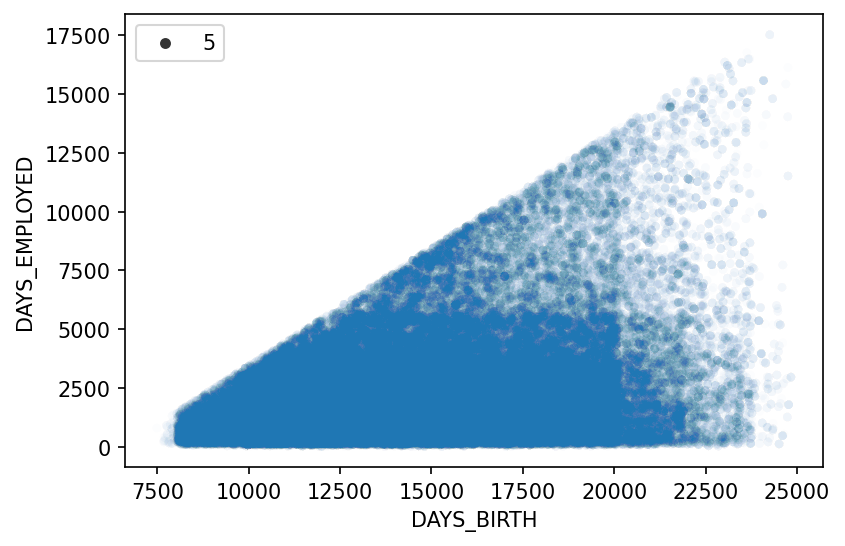

In [68]:
plt.figure(dpi=150)
tmp = sns.scatterplot(data=employed, x="DAYS_BIRTH",y="DAYS_EMPLOYED",alpha=0.01,size=5, linewidth=0)

In [69]:
df["YEARS"]= -1*df["DAYS_BIRTH"]/365

<Figure size 1050x600 with 0 Axes>

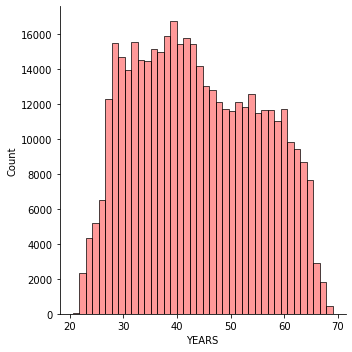

In [70]:
plt.figure(figsize=(7,4),dpi=150)
tmp = sns.displot(data=df, x="YEARS", color="r",bins=40, alpha=0.4)


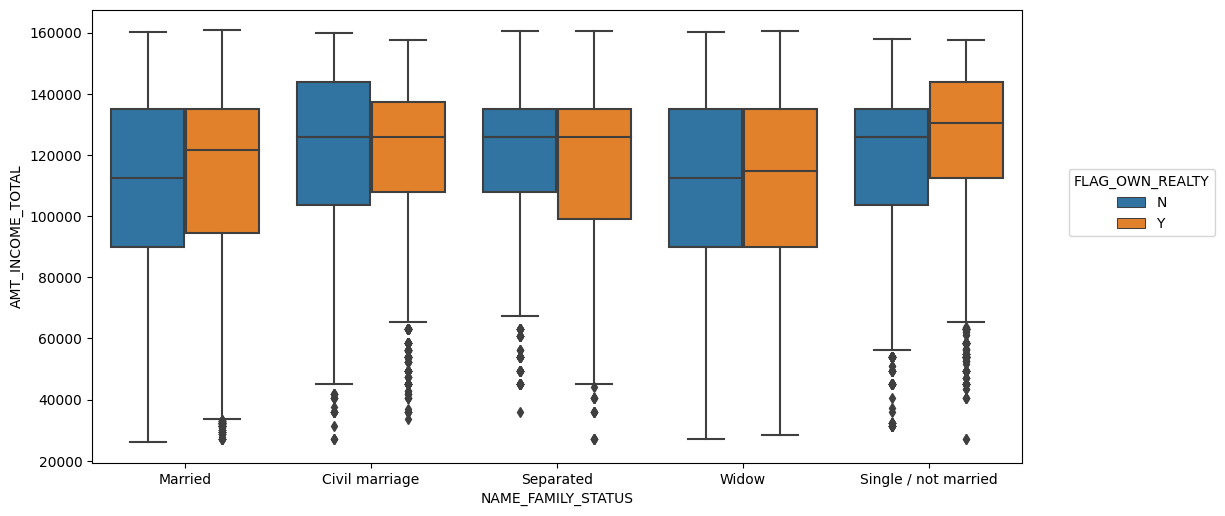

In [71]:
plt.figure(dpi=100, figsize=(12,6))
tmp = sns.boxplot(data=df.sort_values(by=["AMT_INCOME_TOTAL"])[:round(len(df)/2)],x="NAME_FAMILY_STATUS", y="AMT_INCOME_TOTAL", hue="FLAG_OWN_REALTY")
#df[:round(len(df)/2)]
plt.legend(loc=(1.05,0.5),title="FLAG_OWN_REALTY")

In [72]:
df.drop(labels=["FLAG_MOBIL"], axis=1).corr()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,YEARS
ID,1.000000,-0.005178,0.011179,-0.004994,-0.002467,-0.023319,-0.018992,0.032875,-0.001862,0.004994
CNT_CHILDREN,-0.005178,1.000000,0.019177,0.349088,-0.241535,0.038418,-0.038266,0.028457,0.884781,-0.349088
AMT_INCOME_TOTAL,0.011179,0.019177,1.000000,0.053775,-0.141291,-0.033635,0.004444,0.112139,0.011454,-0.053775
DAYS_BIRTH,-0.004994,0.349088,0.053775,1.000000,-0.617908,0.171829,-0.037984,0.096752,0.306179,-1.000000
DAYS_EMPLOYED,-0.002467,-0.241535,-0.141291,-0.617908,1.000000,-0.232208,0.004868,-0.074372,-0.234373,0.617908
FLAG_WORK_PHONE,-0.023319,0.038418,-0.033635,0.171829,-0.232208,1.000000,0.290066,-0.060915,0.049777,-0.171829
FLAG_PHONE,-0.018992,-0.038266,0.004444,-0.037984,0.004868,0.290066,1.000000,-0.001170,-0.024213,0.037984
FLAG_EMAIL,0.032875,0.028457,0.112139,0.096752,-0.074372,-0.060915,-0.001170,1.000000,0.022054,-0.096752
CNT_FAM_MEMBERS,-0.001862,0.884781,0.011454,0.306179,-0.234373,0.049777,-0.024213,0.022054,1.000000,-0.306179
YEARS,0.004994,-0.349088,-0.053775,-1.000000,0.617908,-0.171829,0.037984,-0.096752,-0.306179,1.000000


<AxesSubplot:>

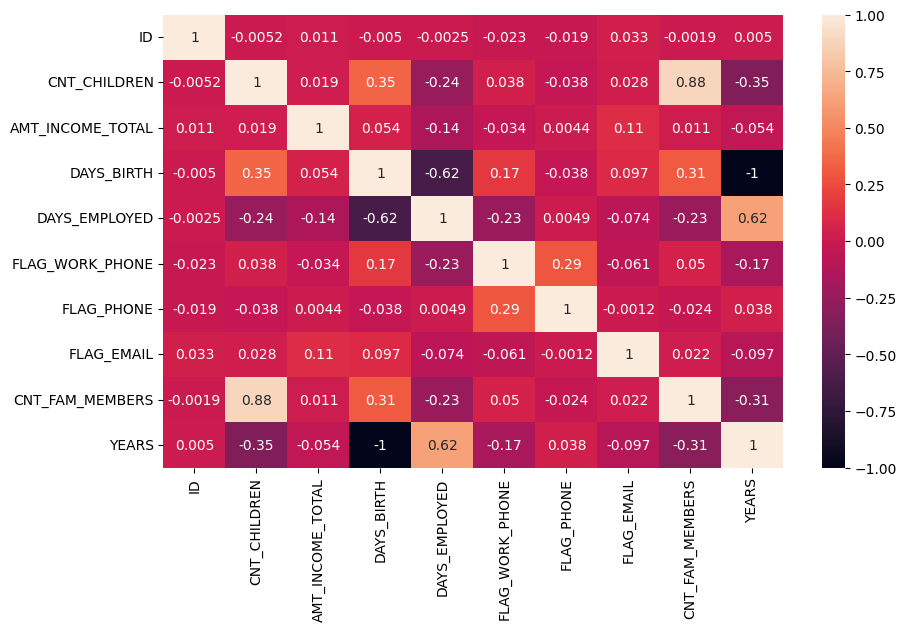

In [73]:
plt.figure(dpi=100, figsize=(10,6))
sns.heatmap(df.drop(labels='FLAG_MOBIL', axis=1).corr(), annot=True)

In [74]:
# url = "https://raw.githubusercontent.com/moncoachdata/MasterClass_DS_ML/main/fandango_scrape.csv"
fandango = pd.read_csv("datas/fandango_scrape.csv")

In [75]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [76]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [77]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

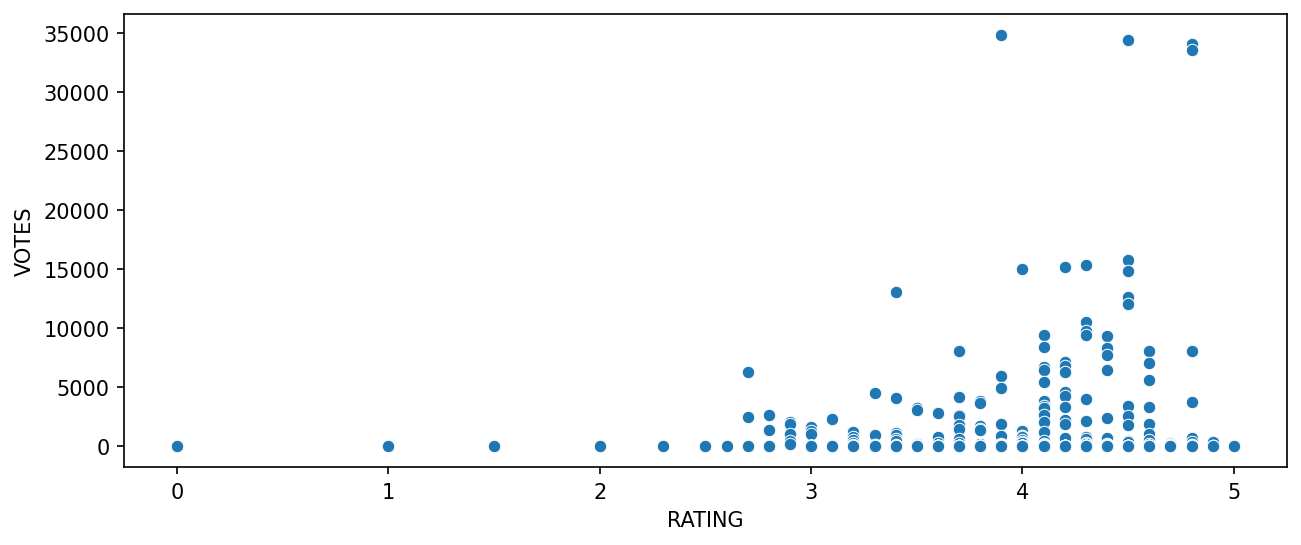

In [78]:
plt.figure(dpi=150, figsize=(10,4))
sns.scatterplot(data=fandango, x="RATING", y="VOTES")

In [79]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [80]:
fandango["FILM"].head()

0    Fifty Shades of Grey (2015)
1          Jurassic World (2015)
2         American Sniper (2015)
3               Furious 7 (2015)
4              Inside Out (2015)
Name: FILM, dtype: object

In [81]:
fandango["FILM"].apply(lambda x : str(x).split(" (")[-1].split(")")[0]).value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: FILM, dtype: int64

In [82]:
fandango["FILM"].apply(lambda x : str(x).split(" (")[-1].split(")")[0]).value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: FILM, dtype: int64

In [83]:
fandango["YEAR"] = fandango["FILM"].apply(lambda x : str(x).split(" (")[-1].split(")")[0])

In [84]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


<AxesSubplot:xlabel='YEAR', ylabel='count'>

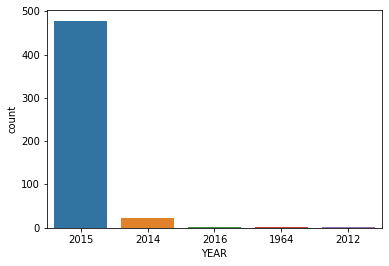

In [85]:
sns.countplot(data=fandango, x="YEAR")

In [86]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [87]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
 4   YEAR    504 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 19.8+ KB


In [88]:
fan_reviews = fandango[fandango["VOTES"]>0]

In [89]:
fan_reviews

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


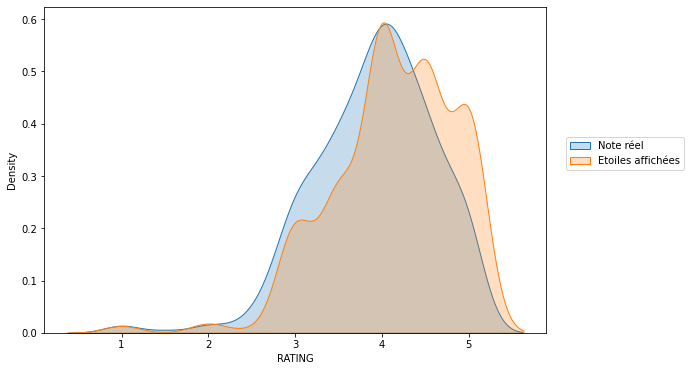

In [90]:
plt.figure(figsize=(9,6))
sns.kdeplot(data=fan_reviews, x="RATING", label="Note réel", fill=True)
sns.kdeplot(data=fan_reviews, x="STARS", label="Etoiles affichées", fill=True)
plt.legend(loc=(1.04,0.5))

In [91]:
fan_reviews["DIFF_RATING"] = (fan_reviews["STARS"] - fan_reviews["RATING"])

/tmp/ipykernel_4921/3486686467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviews["DIFF_RATING"] = (fan_reviews["STARS"] - fan_reviews["RATING"])


In [92]:
fan_reviews["DIFF_RATING"] = fan_reviews["DIFF_RATING"].round(2)

/tmp/ipykernel_4921/214341773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviews["DIFF_RATING"] = fan_reviews["DIFF_RATING"].round(2)


In [93]:
fan_reviews["DIFF_RATING"]

0      0.1
1      0.0
2      0.2
3      0.2
4      0.0
      ... 
430    0.0
431    0.0
432    0.0
433    0.0
434    0.0
Name: DIFF_RATING, Length: 435, dtype: float64

<AxesSubplot:xlabel='DIFF_RATING', ylabel='count'>

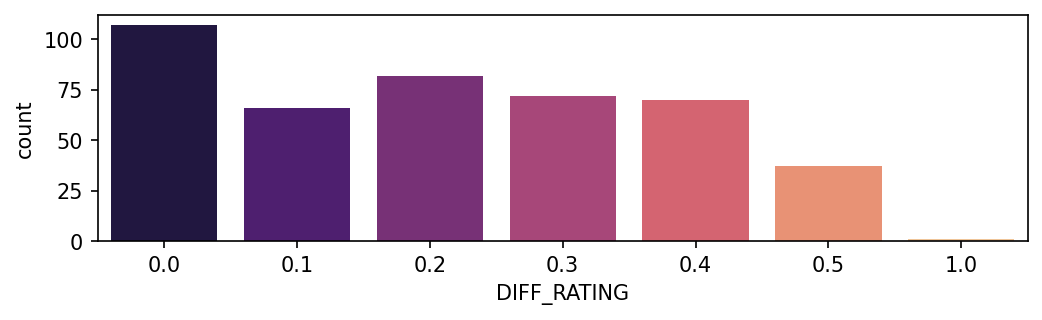

In [94]:
plt.figure(figsize=(8,2),dpi=150)
sns.countplot(data=fan_reviews, x="DIFF_RATING",palette='magma')

In [95]:
fan_reviews["DIFF_RATING"].value_counts()

0.0    107
0.2     82
0.3     72
0.4     70
0.1     66
0.5     37
1.0      1
Name: DIFF_RATING, dtype: int64

In [96]:
#fan_reviews.drop(labels="DIFF_RATES",axis=1, inplace=True)
fan_reviews[fan_reviews["DIFF_RATING"] == 1]

,FILM,STARS,RATING,VOTES,YEAR,DIFF_RATING
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [97]:
# url = "https://raw.githubusercontent.com/moncoachdata/MasterClass_DS_ML/main/all_sites_scores.csv"
all_sites = pd.read_csv("datas/all_sites_scores.csv")


In [98]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [99]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [100]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


(0.0, 100.0)

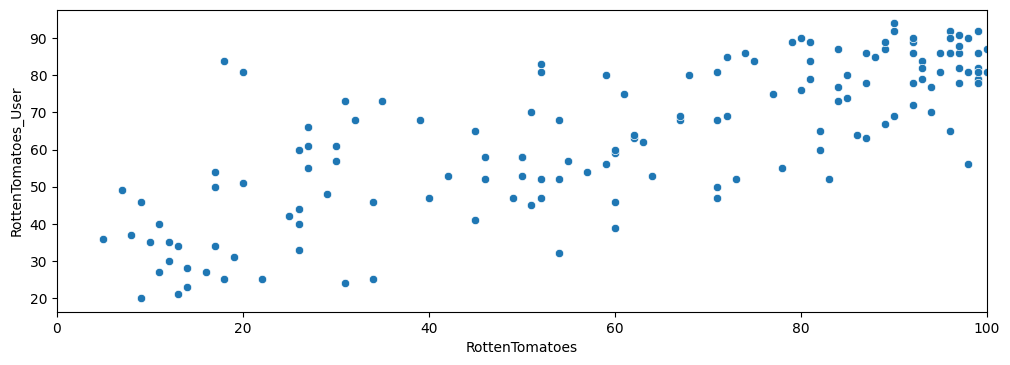

In [101]:
plt.figure(figsize=(12,4), dpi=100)
sns.scatterplot(data=all_sites, x="RottenTomatoes", y="RottenTomatoes_User")
plt.xlim(0,100)

In [102]:
all_sites["DIFF_ROTTEN"] = all_sites["RottenTomatoes"] - all_sites["RottenTomatoes_User"]

In [103]:
all_sites['DIFF_ROTTEN'].apply(abs).mean()

15.095890410958905

<AxesSubplot:xlabel='DIFF_ROTTEN', ylabel='Count'>

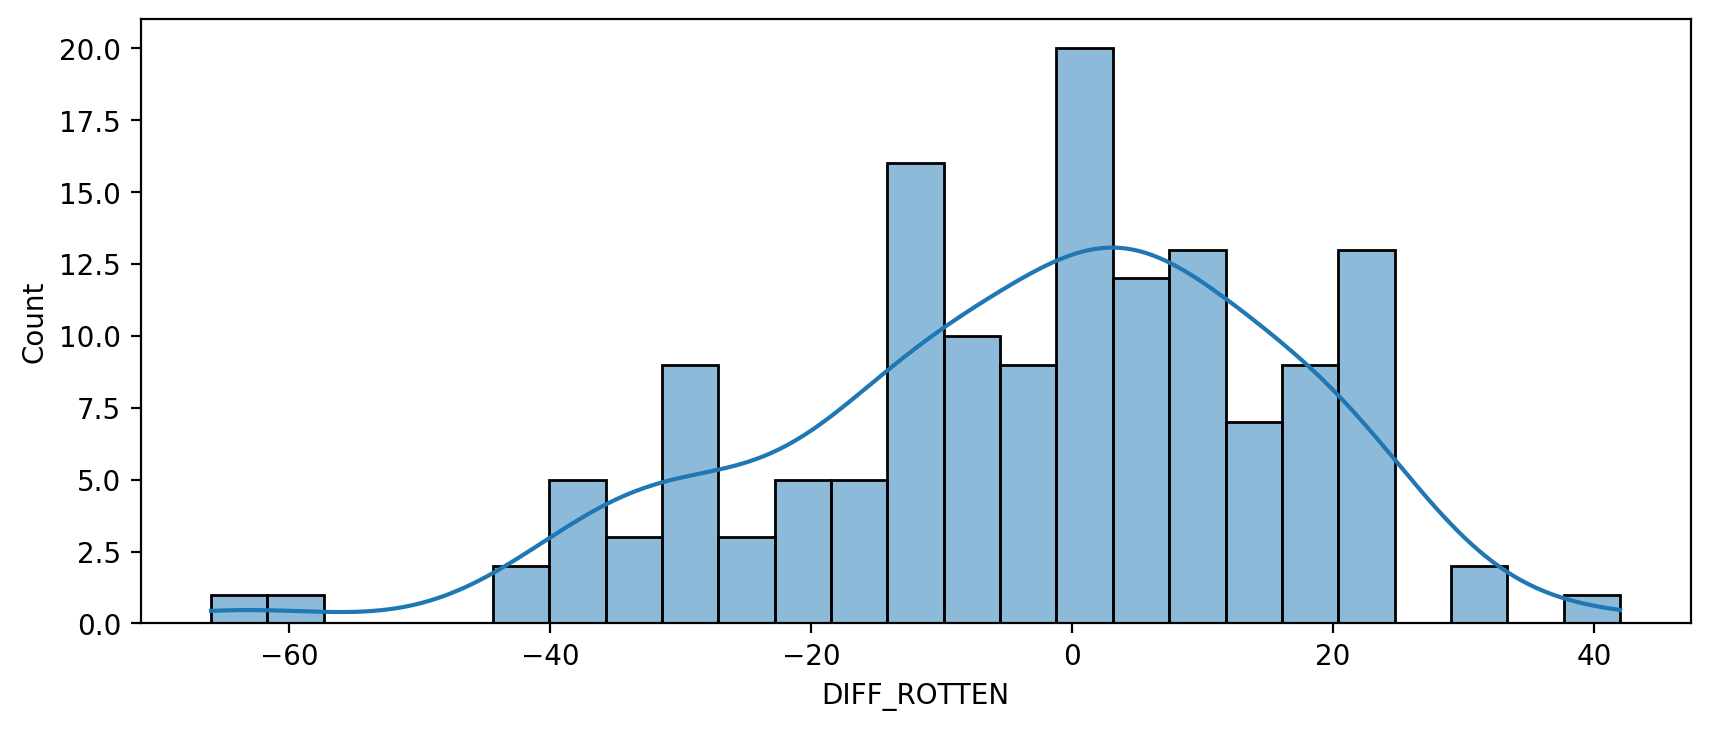

In [104]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=all_sites, x="DIFF_ROTTEN",bins=25,kde=True)

<AxesSubplot:xlabel='DIFF_ROTTEN', ylabel='Count'>

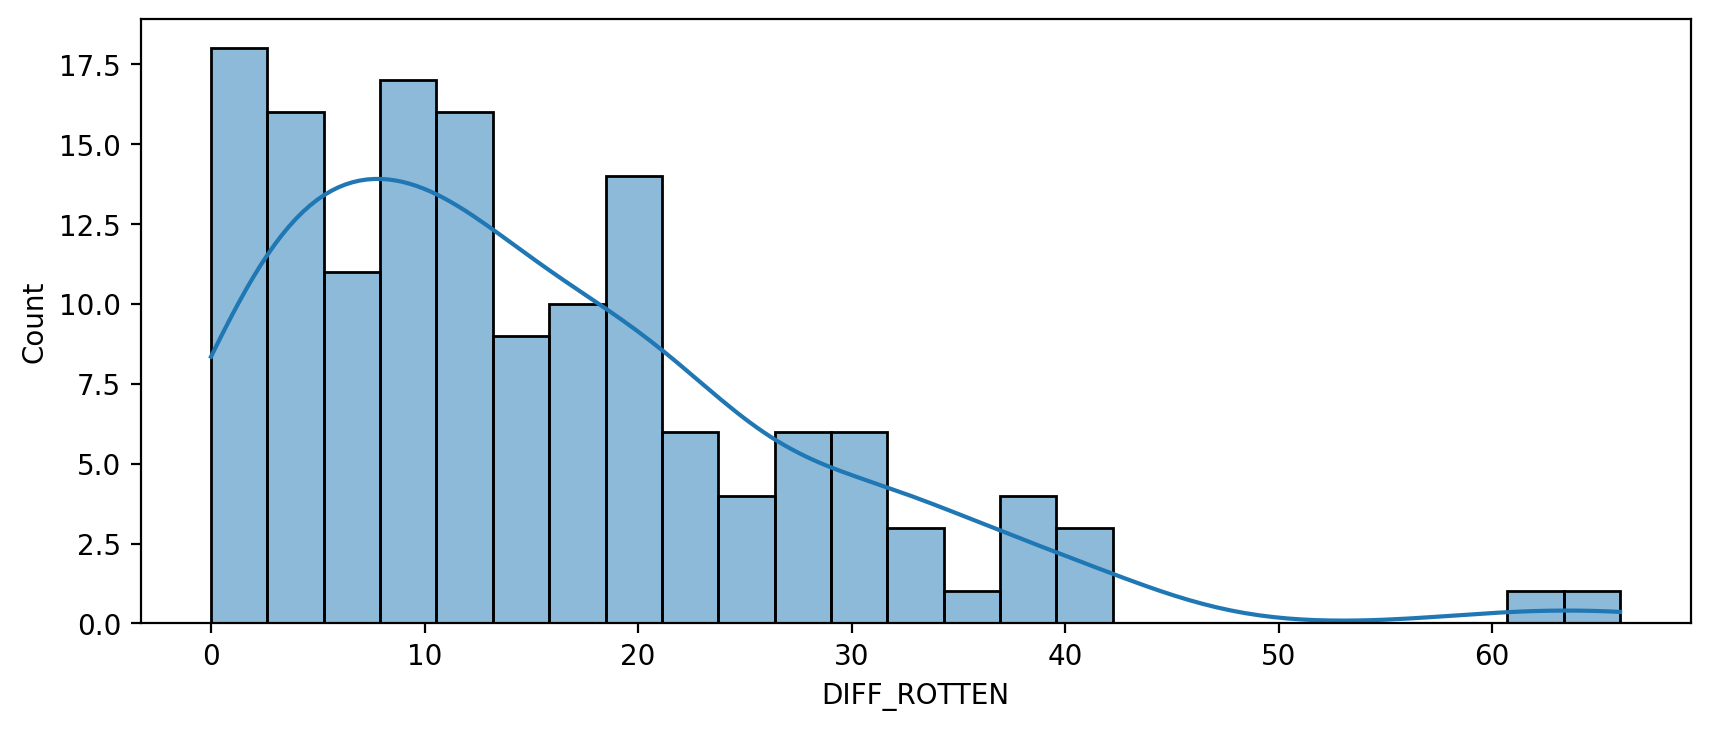

In [105]:
plt.figure(figsize=(10,4), dpi=200)
sns.histplot(x=all_sites["DIFF_ROTTEN"].apply(abs), kde=True, bins=25)

In [106]:
all_sites.nsmallest(5,'DIFF_ROTTEN')["FILM"]

3         Do You Believe? (2015)
85             Little Boy (2015)
105      Hitman: Agent 47 (2015)
134      The Longest Ride (2015)
125    The Wedding Ringer (2015)
Name: FILM, dtype: object

In [107]:
all_sites.nlargest(5,'DIFF_ROTTEN')["FILM"]

69                    Mr. Turner (2014)
112                   It Follows (2015)
115            While We're Young (2015)
37                 Welcome to Me (2015)
40     I'll See You In My Dreams (2015)
Name: FILM, dtype: object

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

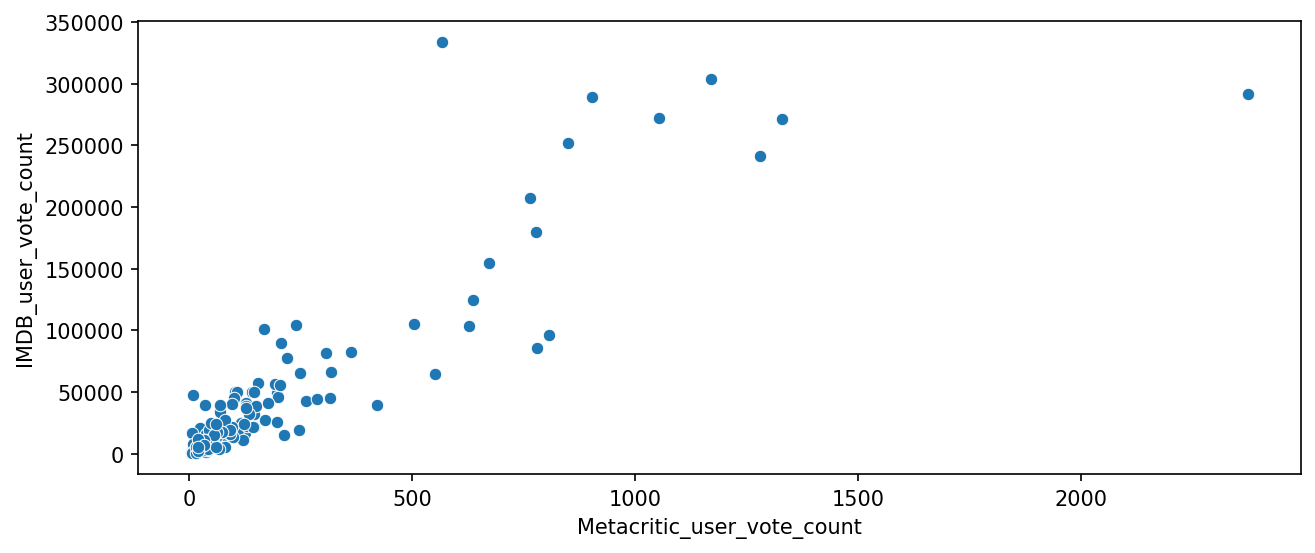

In [108]:
plt.figure(dpi=150, figsize=(10,4))
sns.scatterplot(data=all_sites, x="Metacritic_user_vote_count", y="IMDB_user_vote_count")

In [109]:
all_sites.nlargest(1,"IMDB_user_vote_count")

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,DIFF_ROTTEN
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [110]:
all_sites.nlargest(1,"Metacritic_user_vote_count")

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,DIFF_ROTTEN
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


In [111]:
df = pd.merge(fandango,all_sites, on="FILM", how="inner")

In [112]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,DIFF_ROTTEN
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  DIFF_ROTTEN                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [114]:
df.describe().transpose()["max"]

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
DIFF_ROTTEN                       42.0
Name: max, dtype: float64

In [115]:
df["RT_norm"] = np.round(df['RottenTomatoes'] / 20,1)
df["RTU_norm"] = np.round(df['RottenTomatoes_User'] / 20,1)
df["Meta_norm"] = np.round(df['Metacritic'] / 20,1)
df["Meta_U_norm"] = np.round(df['Metacritic_User'] / 2,1)

In [116]:
df['IMDB_norm'] = np.round(df["IMDB"]/2,1)

In [117]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'DIFF_ROTTEN',
       'RT_norm', 'RTU_norm', 'Meta_norm', 'Meta_U_norm', 'IMDB_norm'],
      dtype='object')

In [118]:
norms_scores = df[['STARS', 'RATING',"RT_norm","RTU_norm",'Meta_norm', 'Meta_U_norm', 'IMDB_norm']]

In [119]:
norms_scores

,STARS,RATING,RT_norm,RTU_norm,Meta_norm,Meta_U_norm,IMDB_norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7


<AxesSubplot:ylabel='Density'>

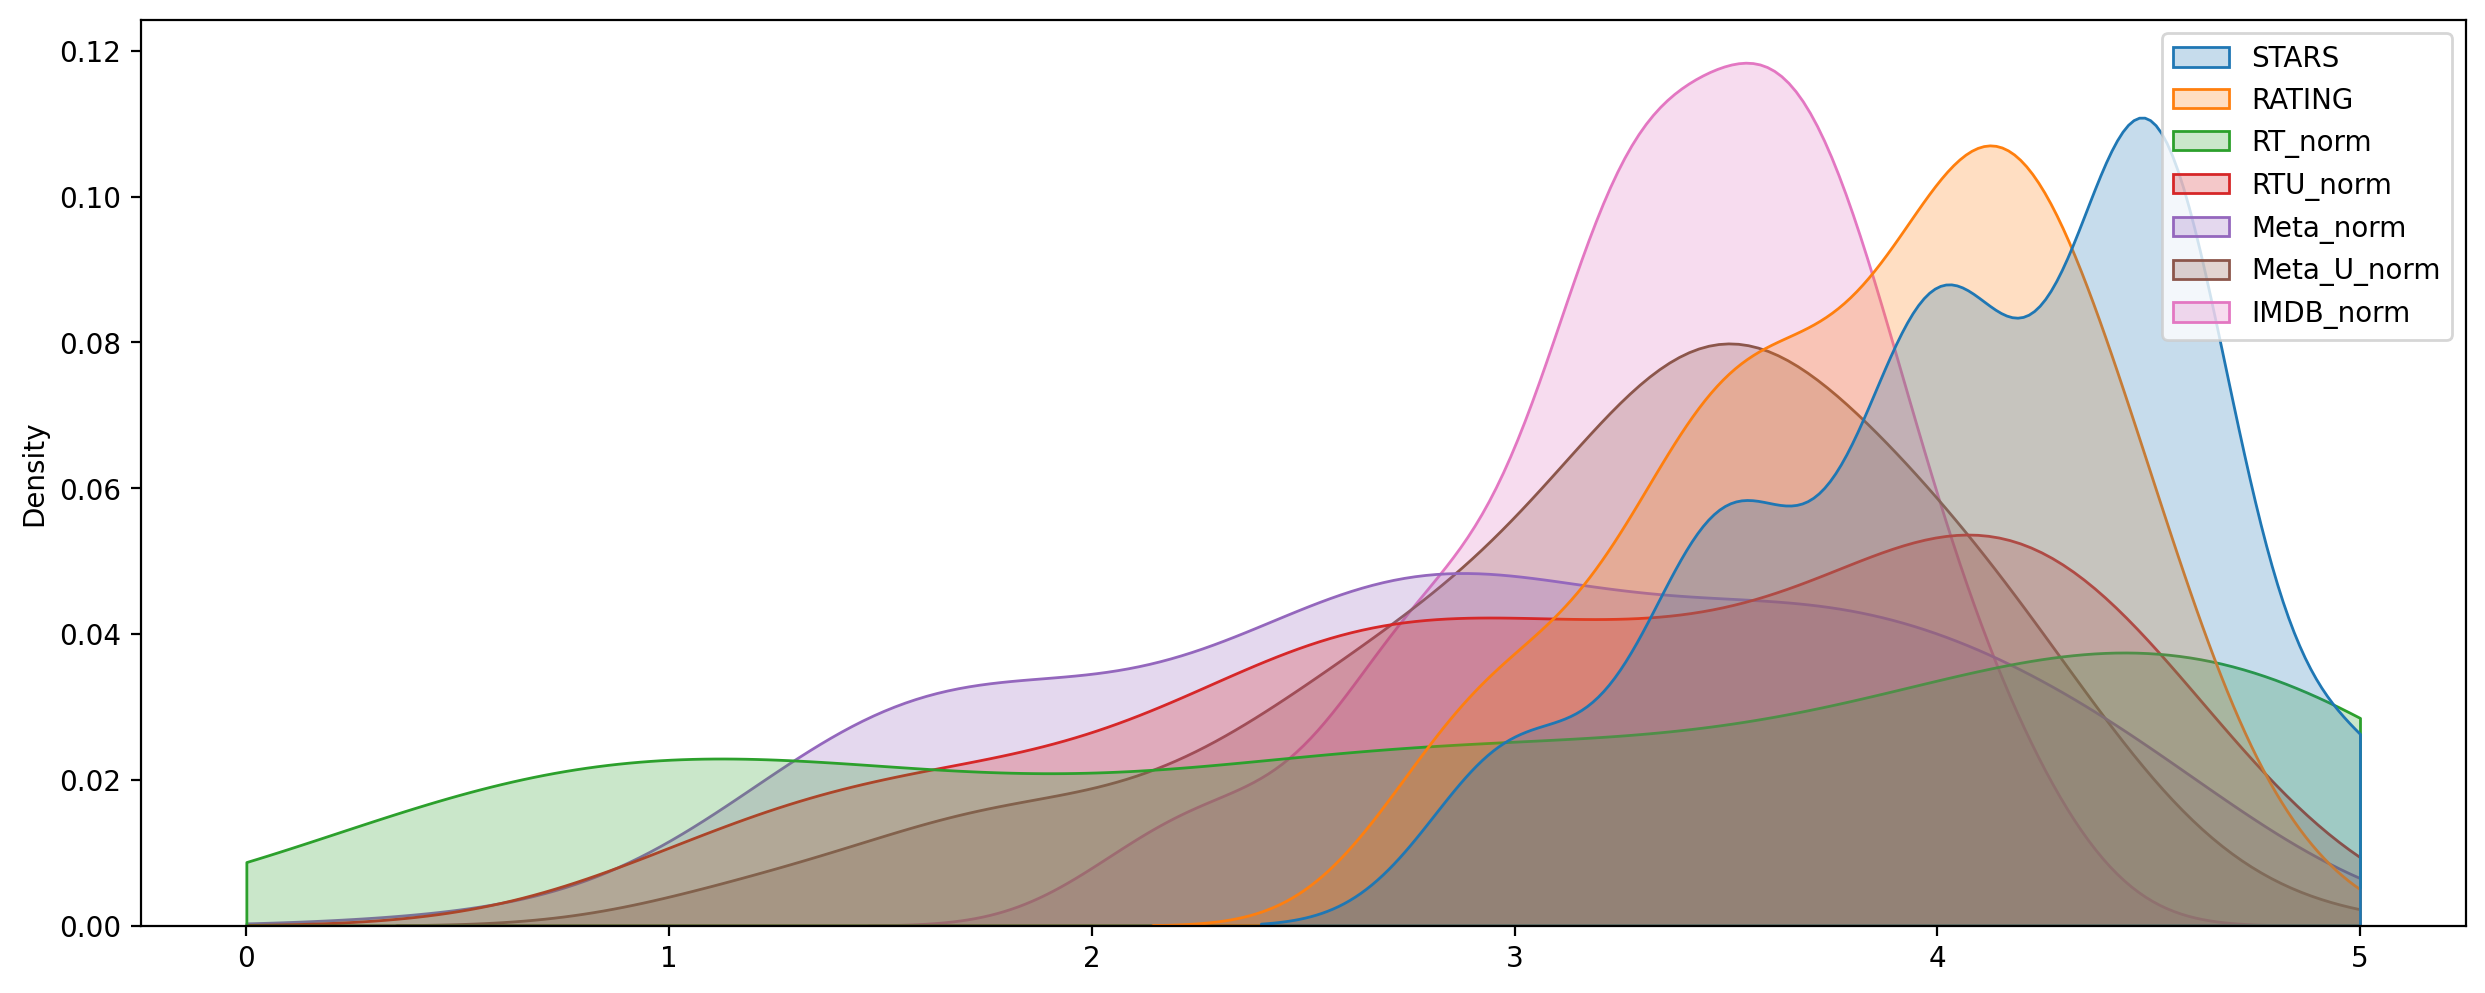

In [126]:
plt.figure(dpi=200,figsize=(15,6))
sns.kdeplot(data=norms_scores, clip=[0,5],fill=True)

NameError: name 'move_legend' is not defined

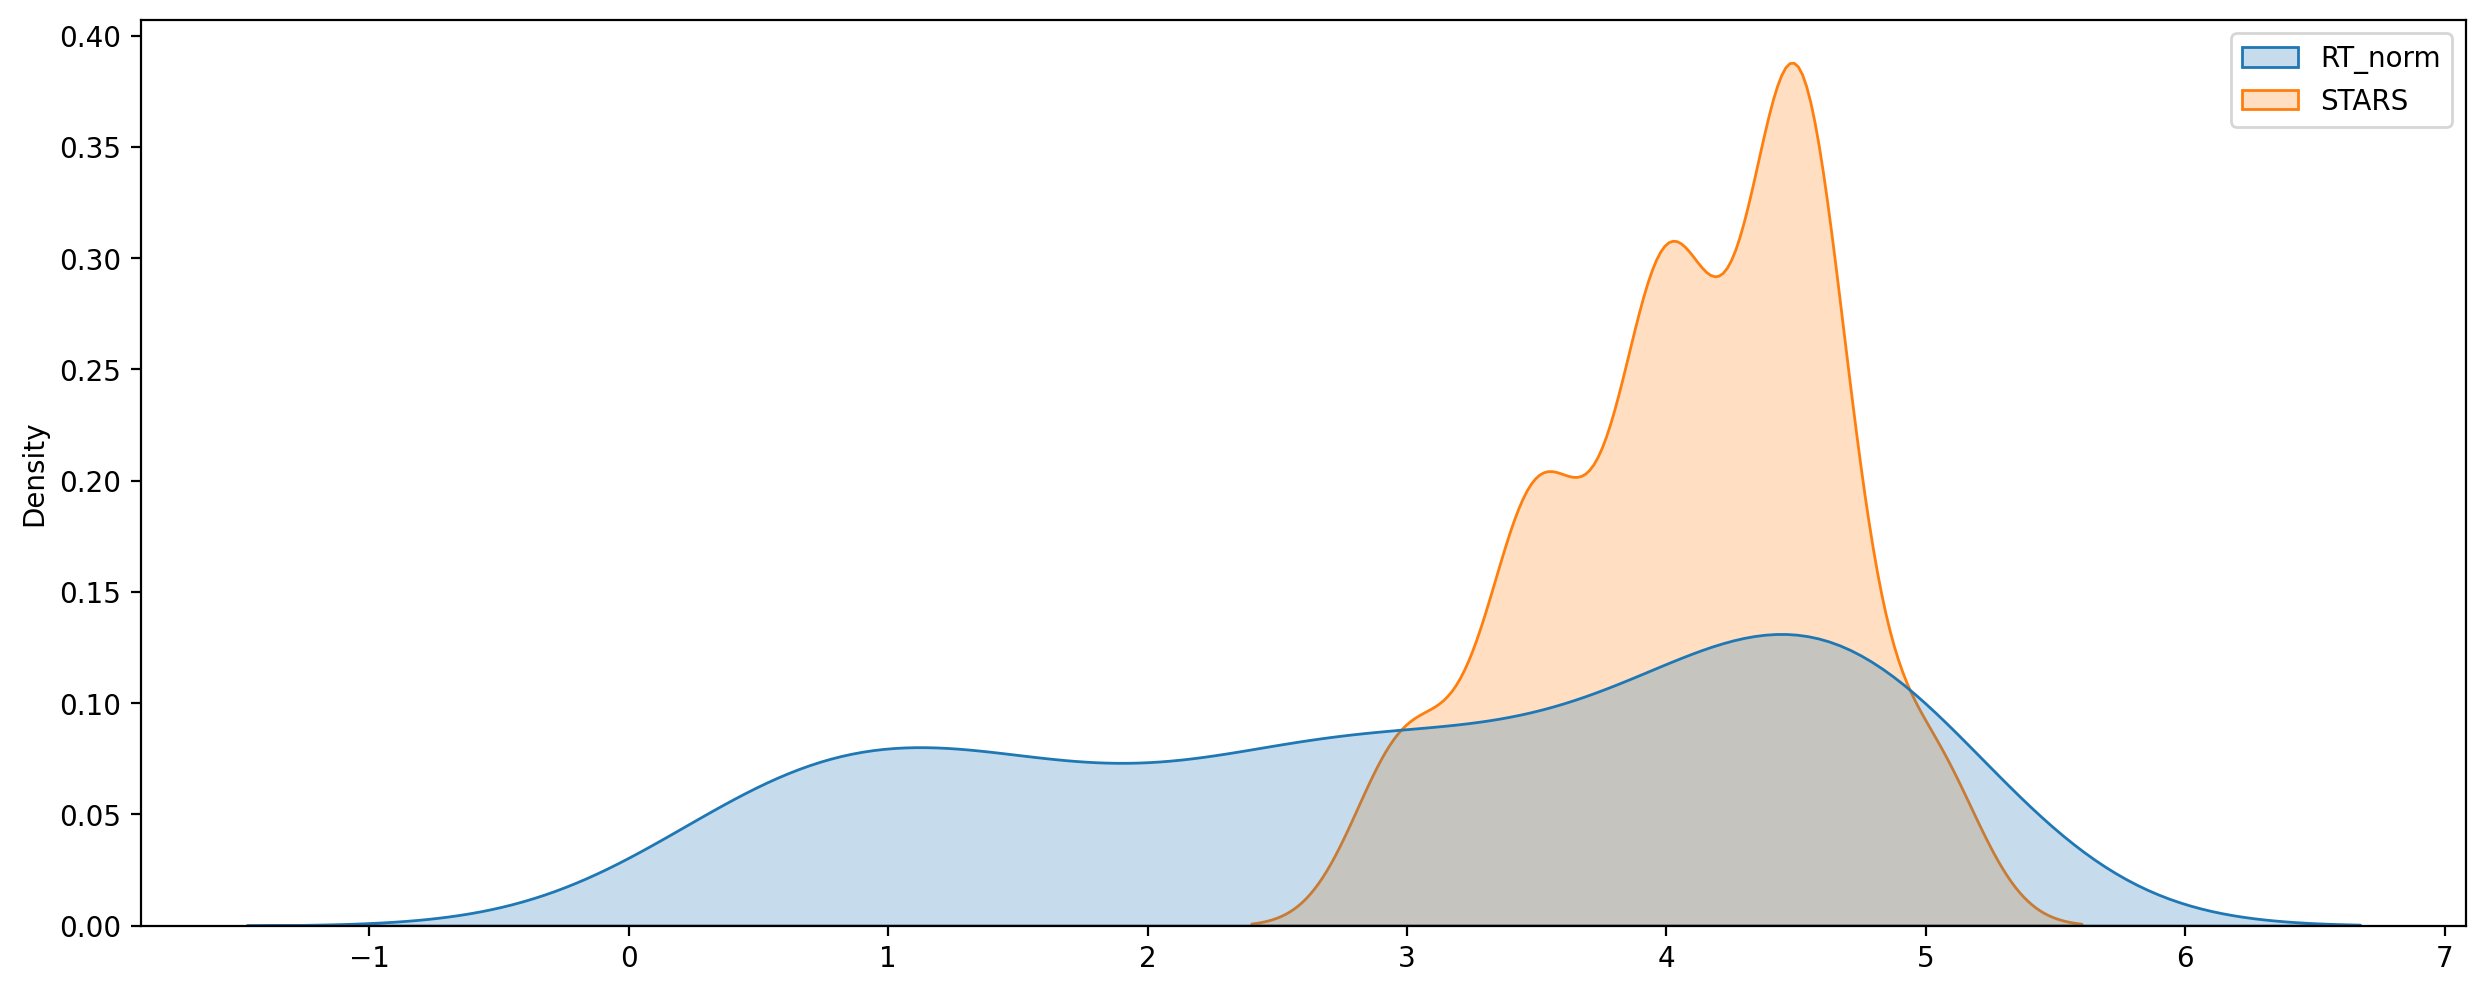

In [139]:
fig, ax = plt.subplots(figsize=(15,6), dpi=200)
sns.kdeplot(data=norms_scores[["RT_norm","STARS"]], shade=True)

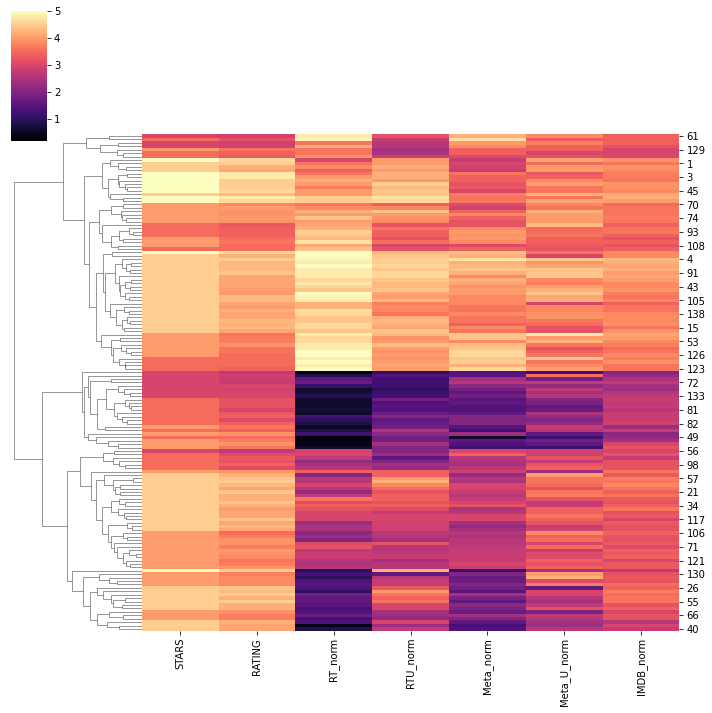

In [132]:
sns.clustermap(data=norms_scores, cmap= 'magma', col_cluster=False)

In [133]:
norm_films = norms_scores.copy() 

In [136]:
norm_films["FIMLS"] = df["FILM"]

In [137]:
norm_films.head()

,STARS,RATING,RT_norm,RTU_norm,Meta_norm,Meta_U_norm,IMDB_norm,FIMLS
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1,Fifty Shades of Grey (2015)
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6,Jurassic World (2015)
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7,American Sniper (2015)
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7,Furious 7 (2015)
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3,Inside Out (2015)


In [140]:
worst_films = norm_films.nsmallest(10,'RT_norm')

<AxesSubplot:ylabel='Density'>

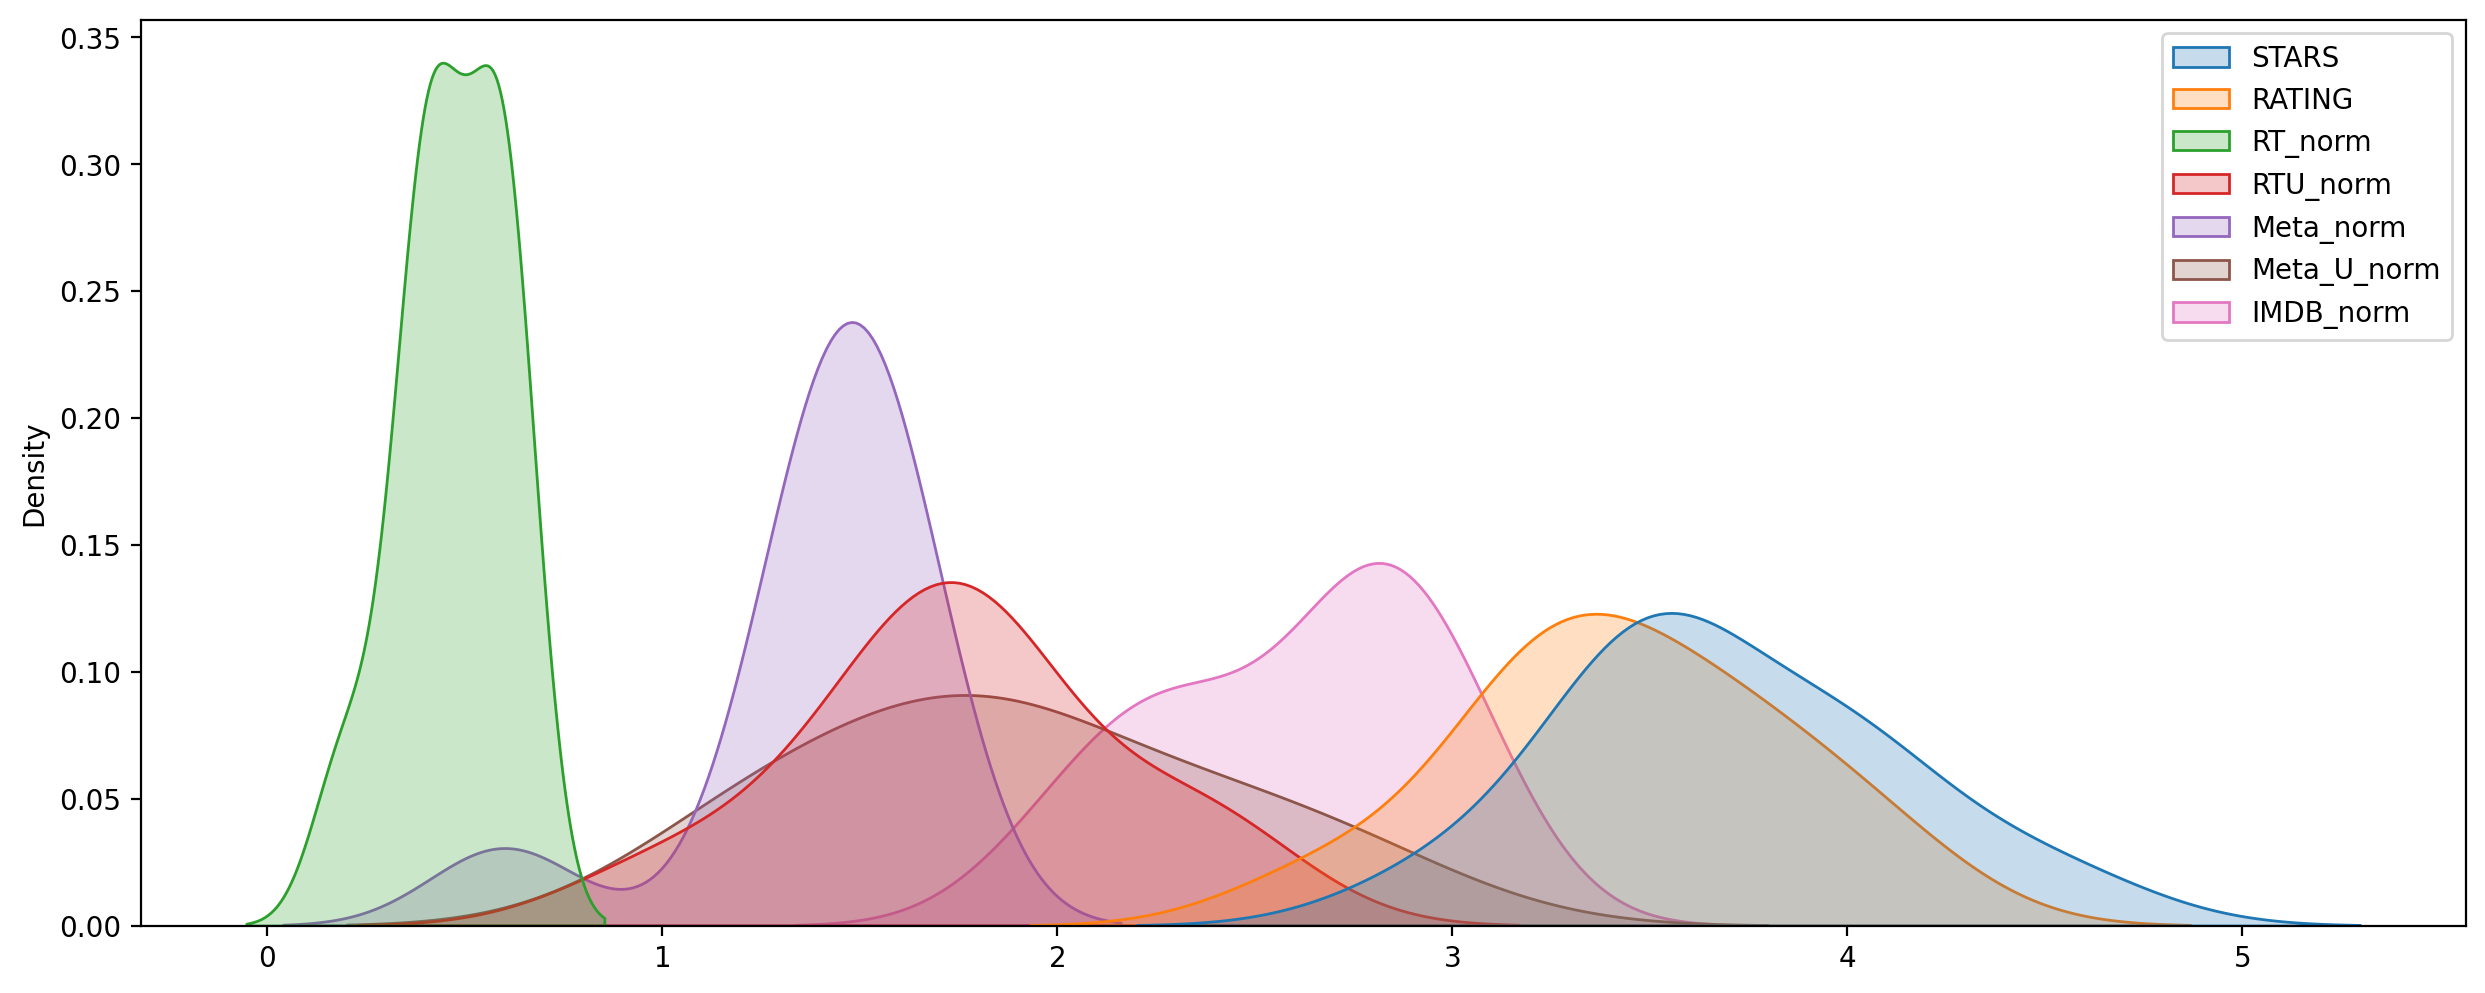

In [142]:
fig, ax = plt.subplots(figsize=(15,6), dpi=200)
sns.kdeplot(data=worst_films, shade=True)
